# 多处文字区域的全图 OCR 应用

结合文本区域检测器和文本内容识别器，实现包含多处文字区域的全图 OCR 应用。

## 进入 MMOCR 主目录

In [1]:
import os
os.chdir('./mmocr')
os.listdir()

['.git',
 '.circleci',
 '.codespellrc',
 '.coveragerc',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmocr',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmocr.egg-info',
 'data',
 'font.TTF',
 'INFO',
 'outputs']

## 导入工具包

In [2]:
# 导入 opencv-python
import cv2

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()


In [3]:
# 导入 MMOCR
from mmocr.utils.ocr import MMOCR

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/pipelines/formating.py:7: UserWarning: DeprecationWarning: mmdet.datasets.pipelines.formating will be deprecated, please replace it with mmdet.datasets.pipelines.formatting.
  warnings.warn('DeprecationWarning: mmdet.datasets.pipelines.formating will be '


## 命令行调用

In [4]:
!python mmocr/utils/ocr.py \
        demo/demo_text_det.jpg \
        --det TextSnake \
        --recog SAR \
        --output outputs/demo_text_det_pred.jpg

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/pipelines/formating.py:7: UserWarning: DeprecationWarning: mmdet.datasets.pipelines.formating will be deprecated, please replace it with mmdet.datasets.pipelines.formatting.
  warnings.warn('DeprecationWarning: mmdet.datasets.pipelines.formating will be '
load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth
/home/featurize/work/MMOCR教程/0327/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. I

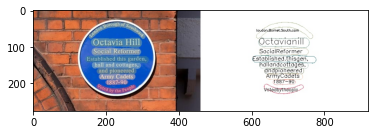

In [5]:
show_img_from_path('outputs/demo_text_det_pred.jpg')

## 导入 OCR 模型

In [6]:
e2e_ocr = MMOCR(det='TextSnake',  # 文本区域检测算法，这里指定为 'TextSnake'
                recog='SAR',      # 文本内容识别算法，这里指定为 'SAR'，也可替换为其他 MMOCR 支持的文本识别算法
                device='cpu')     # 指定运算设备为 cpu 或 cuda

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/featurize/work/MMOCR教程/0327/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [7]:
result = e2e_ocr.readtext('demo/demo_text_ocr.jpg', output='outputs/demo_text_ocr_pred.jpg', details=True)

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/featurize/work/MMOCR教程/0327/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)


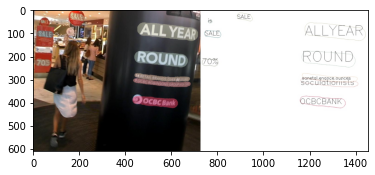

In [8]:
show_img_from_path('outputs/demo_text_ocr_pred.jpg')

输出的 result 列表中包含了所有文本区域的轮廓坐标、区域置信度、文本内容、文本内容置信度

In [8]:
# 所有文字区域的位置、置信度、内容、内容置信度
len(result[0]['result'])

9

In [9]:
result[0]['result'][6].keys()

dict_keys(['box', 'box_score', 'text', 'text_score'])

In [10]:
# 索引为 idx 的 OCR 结果
idx = 6

print('文字区域置信度', result[0]['result'][idx]['box_score'])
print('文本内容', result[0]['result'][idx]['text'])
print('文本内容置信度', result[0]['result'][idx]['text_score'])

文字区域置信度 0.9148945355017204
文本内容 ALLYEAR
文本内容置信度 0.9999942438943046


## 中文 OCR

In [4]:
# 新建目录
!mkdir data/chineseocr/labels/ -p

# 下载中文字库
!wget https://download.openmmlab.com/mmocr/textrecog/sar/dict_printed_chinese_english_digits.txt -O data/chineseocr/labels/dict_printed_chinese_english_digits.txt

--2022-03-27 16:39:41--  https://download.openmmlab.com/mmocr/textrecog/sar/dict_printed_chinese_english_digits.txt
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 45285 (44K) [text/plain]
Saving to: ‘data/chineseocr/labels/dict_printed_chinese_english_digits.txt’

data/chineseocr/lab 100%[===================>]  44.22K  --.-KB/s    in 0s      

2022-03-27 16:39:41 (129 MB/s) - ‘data/chineseocr/labels/dict_printed_chinese_english_digits.txt’ saved [45285/45285]



In [5]:
# 下载中文字体
!wget https://download.openmmlab.com/mmocr/data/font.TTF

--2022-03-27 16:39:41--  https://download.openmmlab.com/mmocr/data/font.TTF
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 21989620 (21M) [font/ttf]
Saving to: ‘font.TTF’

font.TTF            100%[===================>]  20.97M   106MB/s    in 0.2s    

2022-03-27 16:39:41 (106 MB/s) - ‘font.TTF’ saved [21989620/21989620]



In [9]:
mmocr = MMOCR(det='PS_CTW',  # 文本区域检测算法
              recog='SAR_CN',   # 文本内容识别算法
              device='cpu')     # 指定运算设备为cpu或cuda

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/psenet/psenet_r50_fpnf_600e_ctw1500_20210401-216fed50.pth


/home/featurize/work/MMOCR教程/0327/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_chineseocr_20210507-b4be8214.pth


In [10]:
result = mmocr.readtext('demo/highway.jpg', output='demo/out-highway.jpg')

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


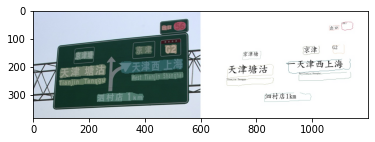

In [11]:
show_img_from_path('demo/out-highway.jpg')

In [12]:
result[0]

{'filename': 'highway',
 'text': ['(S6)',
  '出口',
  'G2',
  '京津',
  '京津塘',
  '一天津西上海',
  '天津塘沽',
  'WestTianjin`Shanghai',
  'Tianjin`Tanggu',
  '泗村店1km']}